In [1]:
pip install fancyimpute 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 7.9 MB/s 
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29899 sha256=8dd0f143a77da3354865db3a2bf35ee993293221cf4492f4c23139ae4e80b5ba
  Stored in directory: /root/.cache/pip/wheels/e3/04/06/a1a7d89ef4e631ce6268ea2d8cde04f7290651c1ff1025ce68
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=a84b4c3b08e0879a10f6e3f2d183c35c0b71c17add9cbbd3a301bbfb437185b9
  Stored in directory: /root/.cache/pip/wheels/72/21/a8/a045cacd9838abd5643f6bfa852c0796a99d6b1494760494e0
Successfully built fancyimpute knnimpute


In [2]:
#importing required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
sns.set(rc={'figure.figsize':(10,6)})

In [3]:
 diabetes = pd.read_csv("/content/diabetes (1).csv", encoding= 'unicode_escape')

In [4]:
`diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
diabetes.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
diabetes.shape

(768, 9)

In [7]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
diabetes.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [9]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

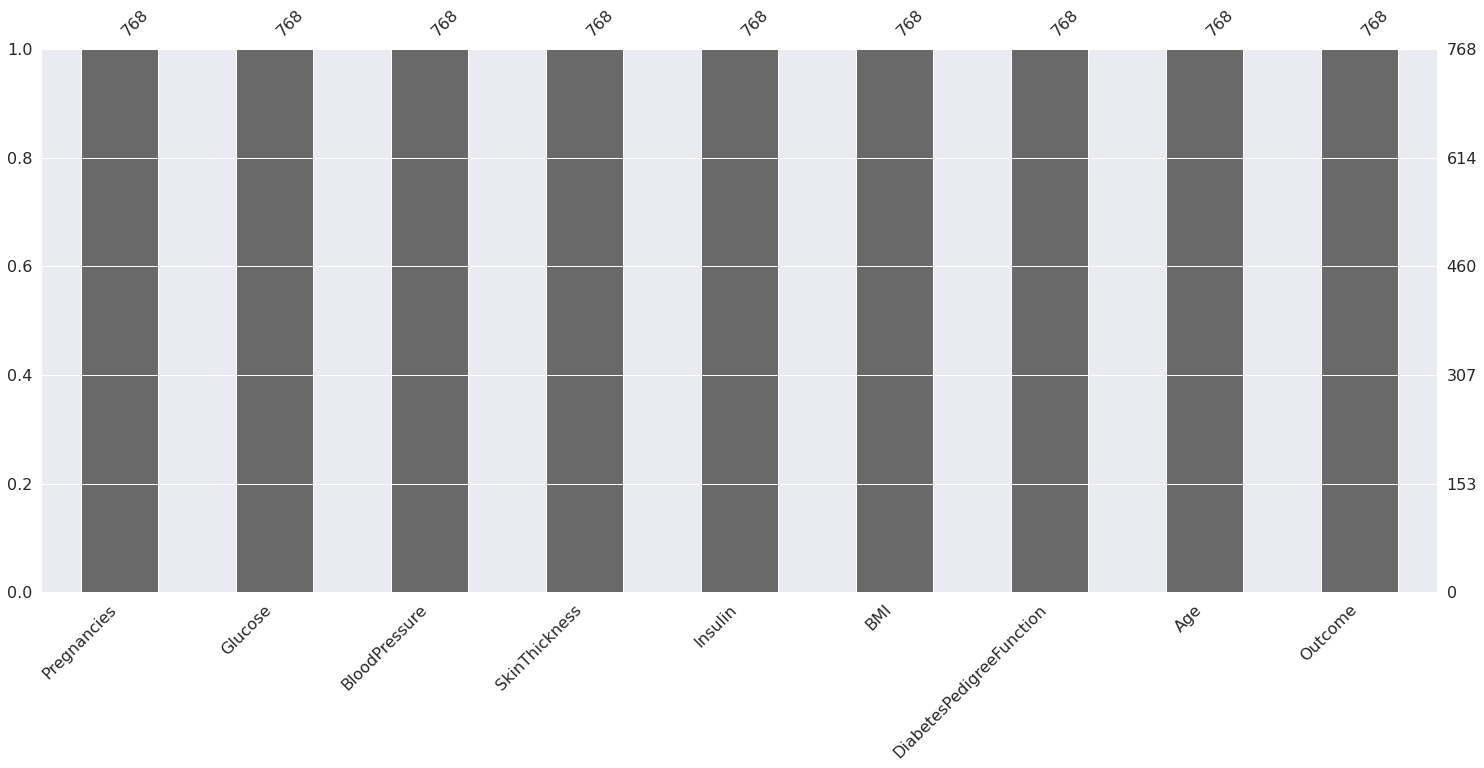

In [10]:
msno.bar(diabetes)

In [11]:
diabetes = diabetes.astype({"Outcome":'category'})

In [12]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


In [13]:
# z_clm = [' Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', ' BMI']
# for i in z_clm:
#     diabetes[i] = diabetes[i].replace(0, np.nan)

In [14]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

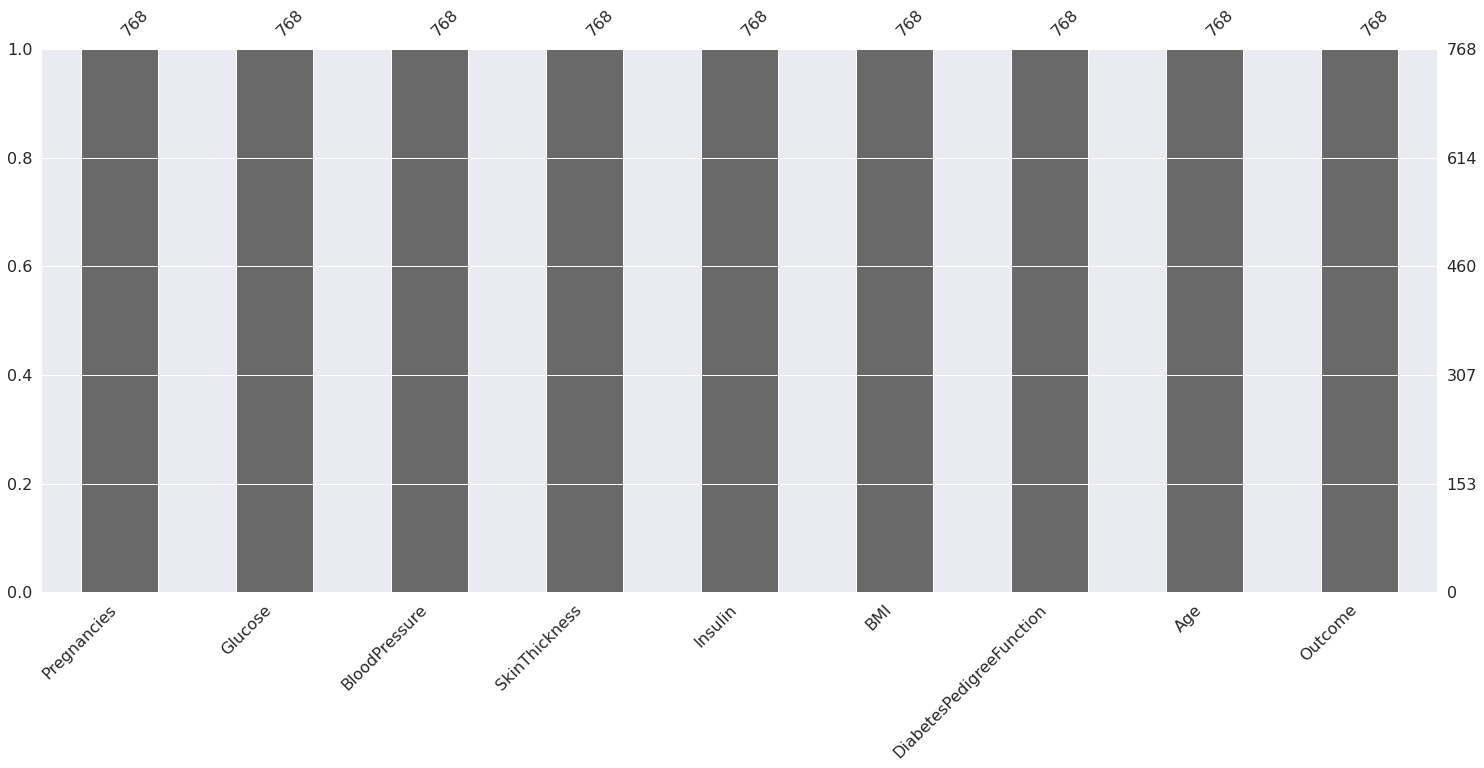

In [15]:
msno.bar(diabetes)

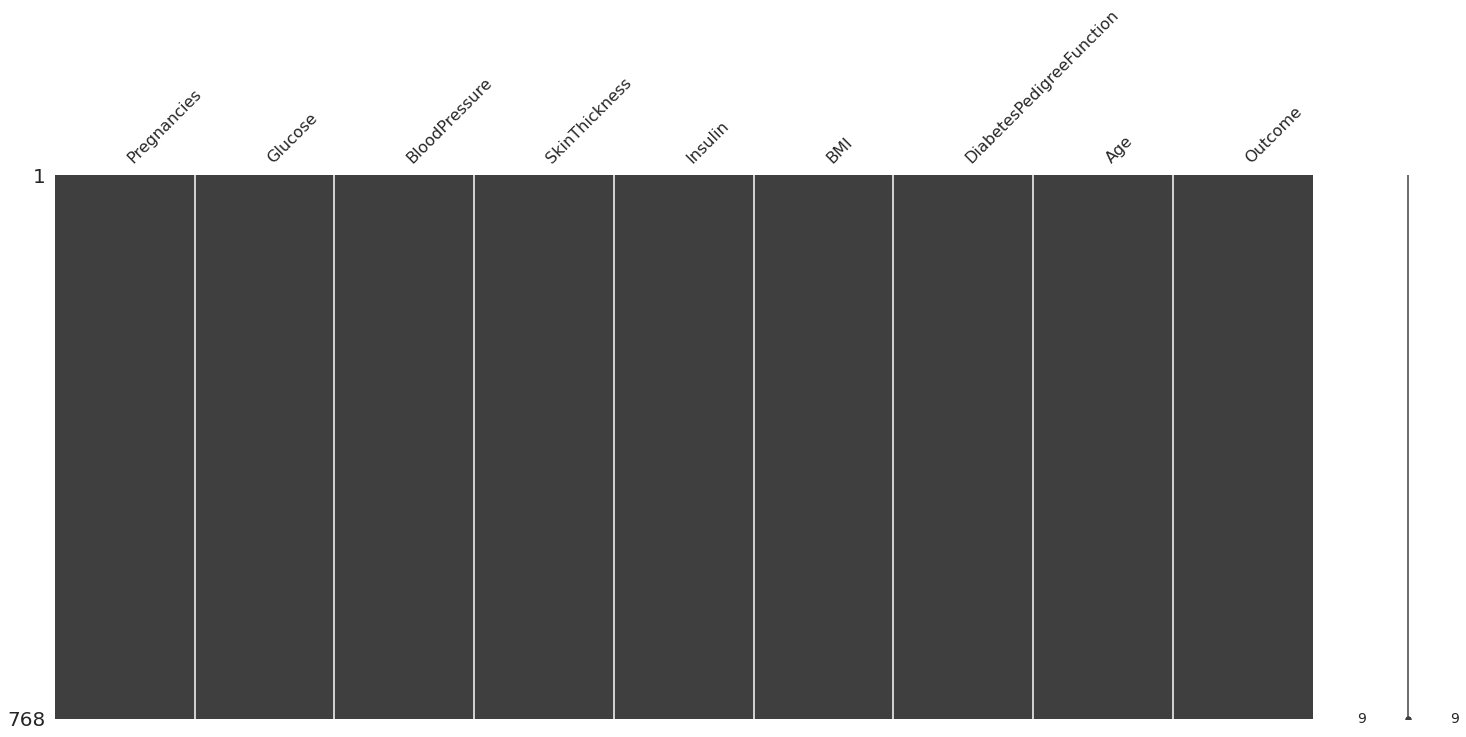

In [16]:
sort = diabetes.sort_values('Insulin')
msno.matrix(sort)

In [17]:
diabetes.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,NaN
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,NaN
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,NaN
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,NaN
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,NaN


In [18]:
from sklearn.impute import SimpleImputer
diabetes_mean = diabetes.copy(deep=True)
mean_imputer = SimpleImputer(strategy= 'mean')
diabetes_mean.iloc[:, :] = mean_imputer.fit_transform(diabetes_mean)

In [19]:
diabetes_median = diabetes.copy(deep=True)
median_imputer = SimpleImputer(strategy= 'median')
diabetes_median.iloc[:, :] = median_imputer.fit_transform(diabetes_median)

In [20]:
diabetes_mode = diabetes.copy(deep=True)
mode_imputer = SimpleImputer(strategy= 'most_frequent')
diabetes_mode.iloc[:, :] = mode_imputer.fit_transform(diabetes_mode)

In [21]:
from fancyimpute import KNN
knn_imputer = KNN()
diabetes_knn = diabetes.copy(deep=True)
diabetes_knn.iloc[:, :] = knn_imputer.fit_transform(diabetes_knn)

Imputing row 1/768 with 0 missing, elapsed time: 0.103
Imputing row 101/768 with 0 missing, elapsed time: 0.103
Imputing row 201/768 with 0 missing, elapsed time: 0.103
Imputing row 301/768 with 0 missing, elapsed time: 0.104
Imputing row 401/768 with 0 missing, elapsed time: 0.104
Imputing row 501/768 with 0 missing, elapsed time: 0.104
Imputing row 601/768 with 0 missing, elapsed time: 0.105
Imputing row 701/768 with 0 missing, elapsed time: 0.105


/usr/local/lib/python3.7/dist-packages/fancyimpute/solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


In [22]:
diabetes_knn = diabetes_knn.astype({"Outcome":'category'})

In [23]:
diabetes_knn.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Text(0, 0.5, 'Frequency')

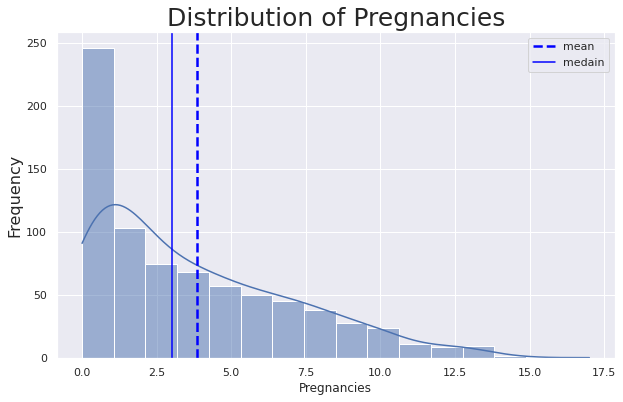

In [24]:
sns.histplot(diabetes_knn['Pregnancies'],kde=True,edgecolor = 'white')
plt.title('Distribution of Pregnancies', fontsize=25)
plt.axvline(x=diabetes_knn['Pregnancies'].mean(),ls='--',lw=2.5, color='blue',label='mean')
plt.axvline(x=diabetes_knn['Pregnancies'].median(), color='blue',label='medain')
plt.legend()
# plt.xlabel(i, fontsize=16)
plt.ylabel('Frequency', fontsize=16)

In [25]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']

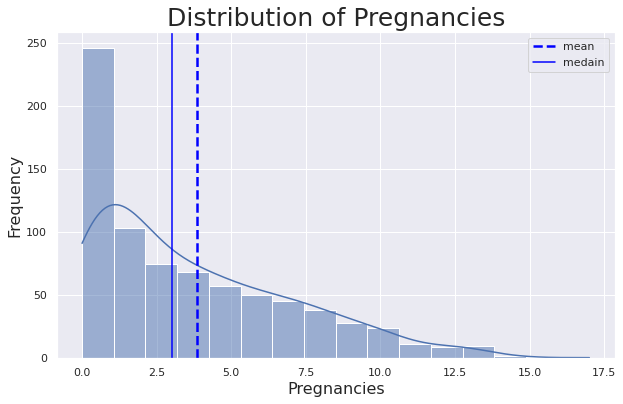

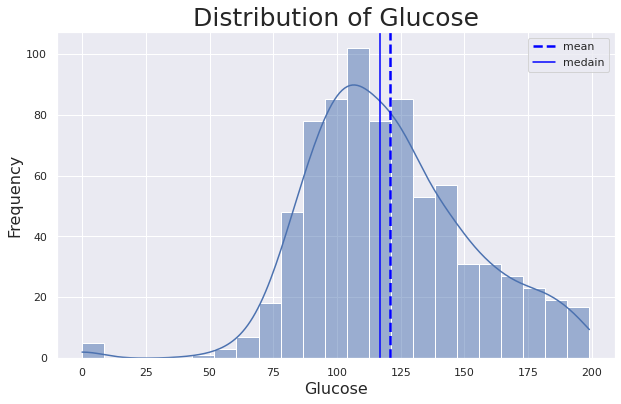

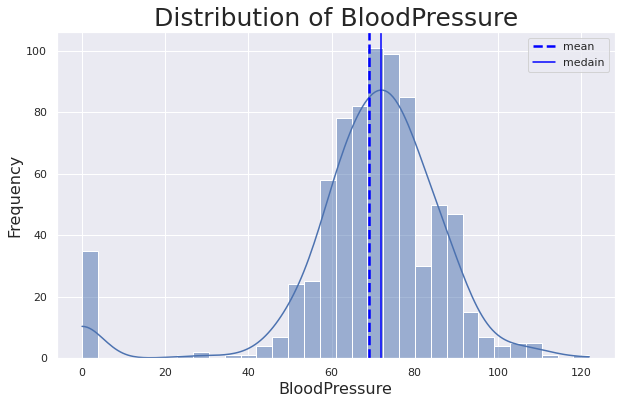

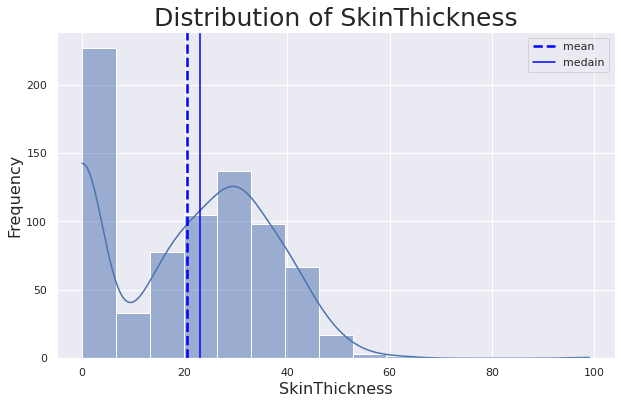

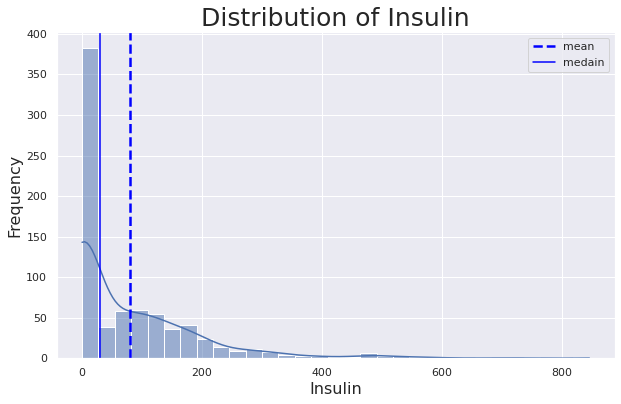

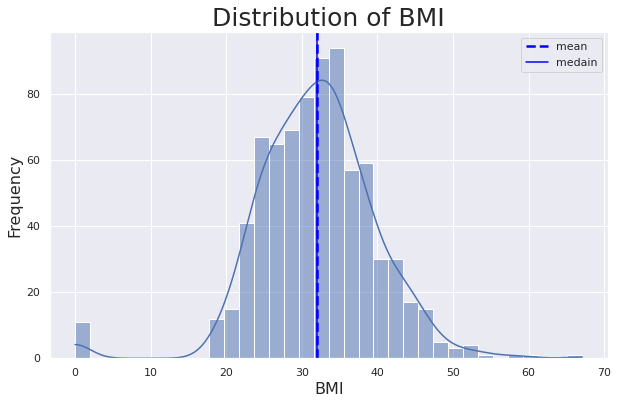

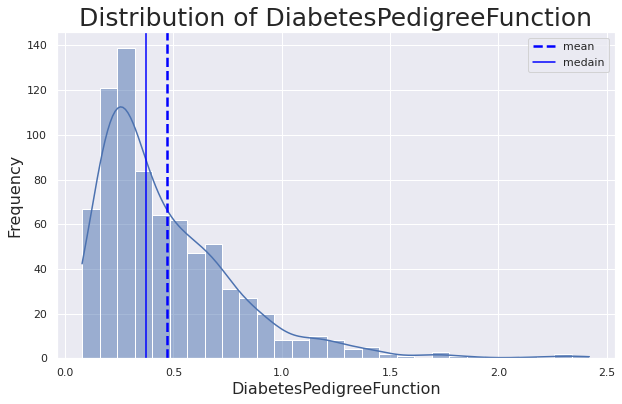

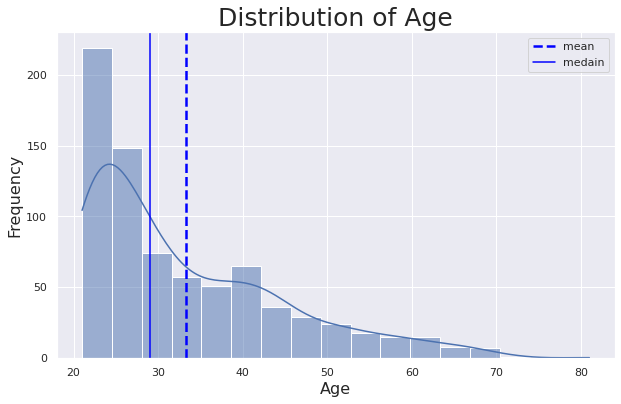

In [26]:
for i in columns:
    fig, ax = plt.subplots(1,1)
    sns.histplot(diabetes_knn[i],kde=True,edgecolor = 'white')
    plt.title('Distribution of %s'%(i), fontsize=25)
    plt.axvline(x=diabetes_knn[i].mean(),ls='--',lw=2.5, color='blue',label='mean')
    plt.axvline(x=diabetes_knn[i].median(), color='blue',label='medain')
    plt.legend()
    plt.xlabel(i, fontsize=16)
    plt.ylabel('Frequency', fontsize=16)

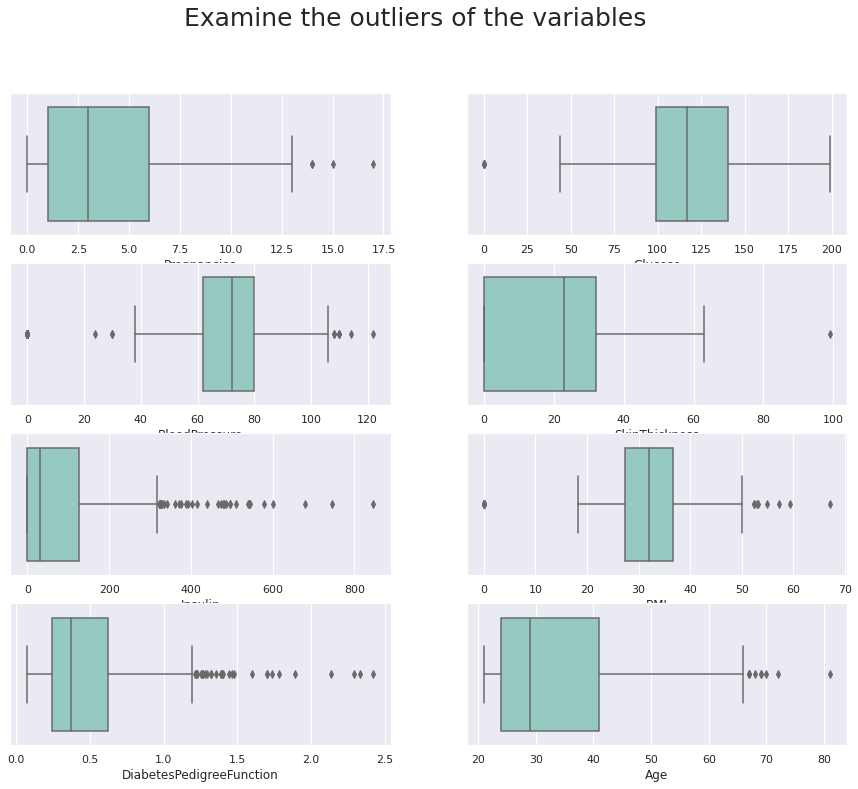

In [27]:
fig, axes = plt.subplots(4, 2, figsize=(15, 12))
  
fig.suptitle('Examine the outliers of the variables', fontsize=25)

sns.boxplot(x = diabetes_knn['Pregnancies'], ax=axes[0, 0], palette='Set3')
sns.boxplot(x = diabetes_knn['Glucose'], ax=axes[0, 1], palette='Set3')
sns.boxplot(x = diabetes_knn['BloodPressure'], ax=axes[1, 0], palette='Set3')
sns.boxplot(x = diabetes_knn['SkinThickness'], ax=axes[1, 1], palette='Set3')
sns.boxplot(x = diabetes_knn['Insulin'], ax=axes[2, 0], palette='Set3')
sns.boxplot(x = diabetes_knn['BMI'], ax=axes[2, 1], palette='Set3')
sns.boxplot(x = diabetes_knn['DiabetesPedigreeFunction'], ax=axes[3, 0], palette='Set3')
sns.boxplot(x = diabetes_knn['Age'], ax=axes[3, 1], palette='Set3')

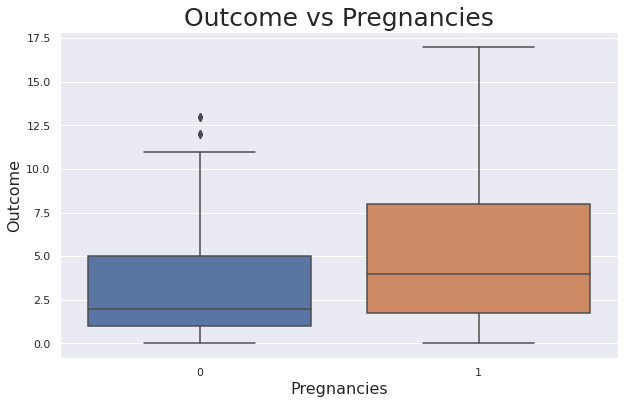

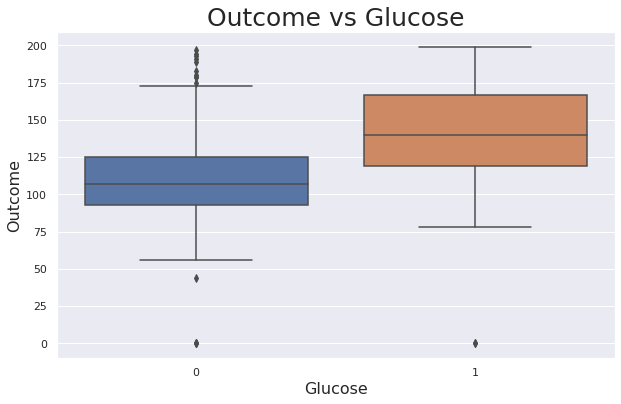

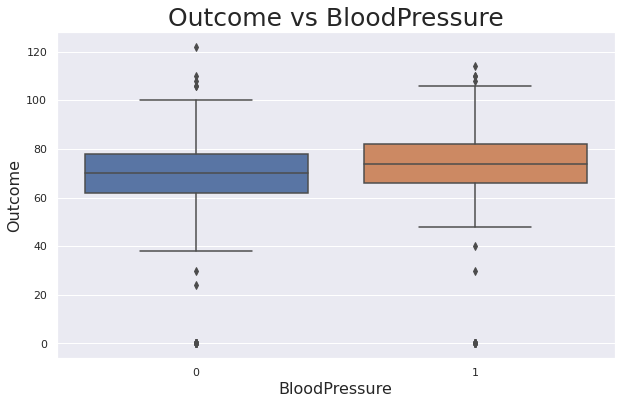

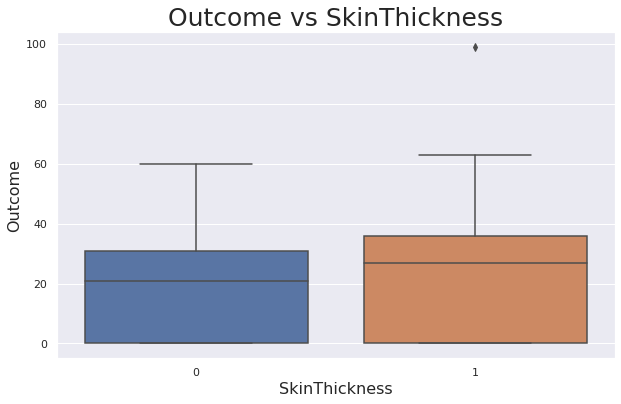

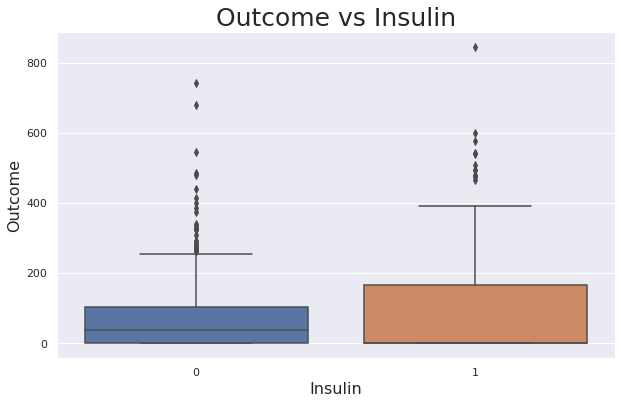

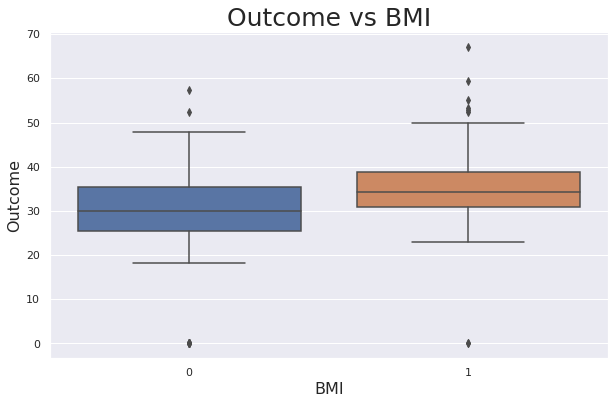

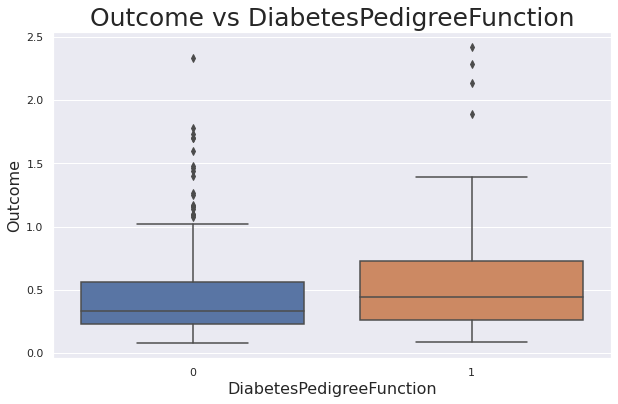

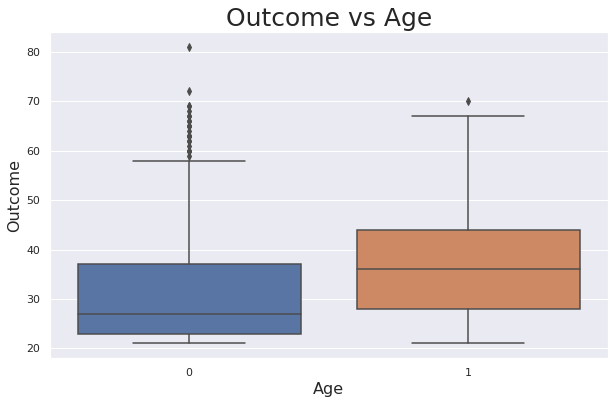

In [62]:
for i in columns:
    fig, ax = plt.subplots(1,1)
    sns.box
        plot(y =diabetes[i], x =diabetes['Outcome'])
    plt.title('Outcome vs %s'%(i), fontsize=25)
    plt.xlabel(i, fontsize=16)
    plt.ylabel('Outcome', fontsize=16)

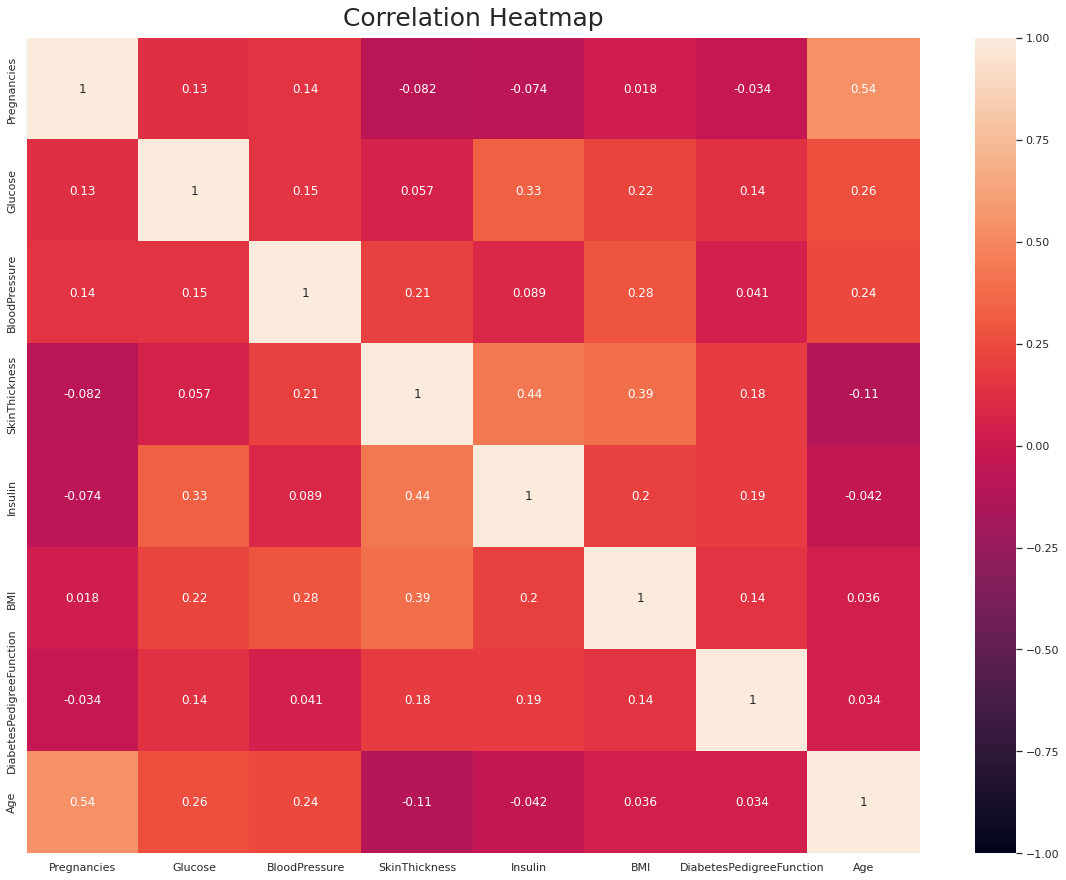

In [28]:
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(diabetes.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':25}, pad=12);

In [29]:
x = diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = diabetes[['Outcome']]

In [30]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [31]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [32]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X = sc.fit_transform(x)

In [33]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# x_train, y_train, x_test, y_test = train_test_split(X,y, train_size=0.25, random_state=101)
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=101)

In [36]:
from sklearn.linear_model import LogisticRegression ## 77
from sklearn.ensemble import RandomForestClassifier ## 100
from sklearn.tree import DecisionTreeRegressor ## 100
from sklearn.tree import DecisionTreeClassifier ## 100
from sklearn.neighbors import KNeighborsClassifier ## 81
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

In [37]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [38]:
y_pred = model.predict(x_train)
print(accuracy_score(y_train, y_pred))

0.8177083333333334


In [39]:
cm = confusion_matrix(y_train, y_pred)

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

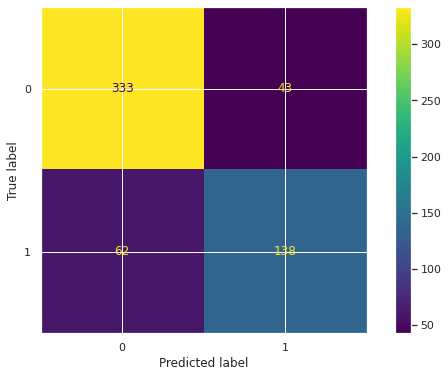

In [41]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [42]:
prec = 165 / (165+5)
prec

0.9705882352941176

In [43]:
rec = 165 / (165+35)
rec

0.825

In [44]:
print("Classification Report \n")
print(classification_report(y_train, y_pred))

Classification Report 

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       376
           1       0.76      0.69      0.72       200

    accuracy                           0.82       576
   macro avg       0.80      0.79      0.79       576
weighted avg       0.82      0.82      0.82       576



In [45]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_train, y_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

MAE: 0.18229166666666666
MSE: 0.18229166666666666
RMSE: 0.42695628191498325


In [46]:
model.fit(x_test, y_test)
pred = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [47]:
print(accuracy_score(y_test, pred))

0.796875


In [48]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.203125
MSE: 0.203125
RMSE: 0.45069390943299864


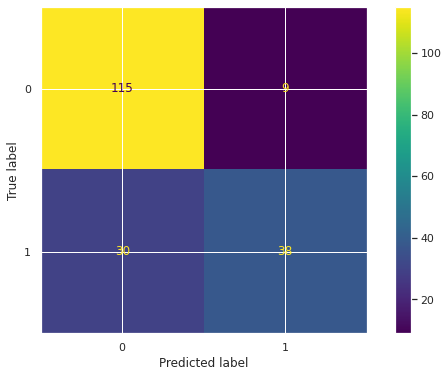

In [49]:
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [50]:
print("Classification Report \n")
print(classification_report(y_test, pred))

Classification Report 

              precision    recall  f1-score   support

           0       0.79      0.93      0.86       124
           1       0.81      0.56      0.66        68

    accuracy                           0.80       192
   macro avg       0.80      0.74      0.76       192
weighted avg       0.80      0.80      0.79       192



In [51]:
x_test[:10]

array([[-0.84488505,  0.1597866 , -0.47073225, -1.28821221, -0.69289057,
        -0.24020459, -0.37110101,  1.17073215],
       [-0.25095213,  2.06891246,  0.04624525,  0.09180513,  1.04368861,
         0.55938666, -0.19291401,  0.23476686],
       [ 0.93691372, -0.46615631,  1.18359575, -0.15910711, -0.69289057,
        -1.179407  , -0.71539454,  1.2558199 ],
       [-1.14185152,  0.44146091, -0.05715025,  1.34636635,  1.47783341,
         1.30821021, -0.32277912, -0.78628618],
       [ 0.04601433, -1.15469351,  1.08020025,  0.15453319, -0.2066484 ,
         0.95283632, -0.94492356, -0.70119842],
       [-1.14185152,  1.84983245,  0.45982725,  2.66365564, -0.57133003,
         3.4785293 ,  5.88356477, -0.70119842],
       [-0.84488505,  1.88112959, -0.26394125,  0.59362962,  0.87003069,
         0.26747239, -0.43452351,  0.40494237],
       [-0.25095213, -1.87452785,  0.66661825,  0.4681735 , -0.69289057,
         0.30554817, -0.69123359,  1.08564439],
       [-1.14185152,  0.44146091

In [56]:
pred[:10]

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 0])

In [57]:
y_test.head(10)

,Outcome
766,1
748,1
42,0
485,1
543,0
445,1
427,1
352,0
428,0
123,0


In [54]:
from joblib import dump, load
dump(model, 'Diabetes_model.joblib')

['Diabetes_model.joblib']

In [55]:
input = np.array([[0.04601433, -1.15469351,  1.08020025,  3.66365564, -0.57133003,
        1.4785293 ,  0.94492356, -0.701198422]])
model.predict(input)

array([0])